In [1]:
path="https://raw.githubusercontent.com/Ashutoshrx/Covid-19/master/data/new_corona%20(1)%20(1).csv"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv(path)
print(df.shape)
df.head()

(141, 211)


,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,...,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,...,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,1.410000e+02,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,70.000000,762.099291,236.716312,1247.624113,252.028369,9.858156,1.099291,7.943262,1385.255319,715.397163,33.787234,2500.099291,5585.815603,582.680851,23.801418,1036.602837,2413.517730,27.340426,3951.510638,14381.914894,5.340426,39.063830,31.687943,3.070922,448.326241,1.609929,519.822695,6.134752,28337.631206,1.858156,58.914894,453.985816,213.787234,4.531915,50.021277,549.751773,15491.063830,41.382979,463.773050,22.787234,...,47.297872,4333.531915,21.595745,410.964539,507.021277,169.815603,2007.879433,5504.177305,20.028369,74131.709220,183.085106,194.262411,4.042553,6307.758865,10289.368794,12.957447,172.971631,85.375887,1044.226950,5.723404,42.475177,43.815603,309.843972,32825.156028,3.730496,31.567376,2921.744681,3601.446809,49920.021277,96.801418,3.142801e+05,20.773050,215.312057,568.042553,111.319149,114.361702,1.021277,7.304965,58.283688,9.439716
std,40.847277,1562.477124,324.002873,1991.844040,322.544968,14.932506,1.415753,10.634024,2169.805898,1155.130270,43.942301,3047.238720,6827.021419,909.010587,34.687836,1745.014932,5308.513523,35.375300,7872.405494,20287.312446,7.776181,86.567415,46.043324,4.580464,928.652015,2.451743,761.503891,9.437176,57168.810936,2.666141,64.565193,678.781503,289.860578,8.563672,56.819698,909.834248,24299.177855,85.025010,316.232766,32.578435,...,111.547411,7981.569877,31.425417,568.271482,608.911564,363.559282,3611.206669,4855.573703,57.199893,93150.779736,292.877119,503.068210,4.749244,9356.406561,12733.868351,18.864506,185.049373,283.324840,1278.358637,9.749803,68.927973,52.767360,416.867490,51393.158340,5.065118,50.978470,5234.257514,6393.096527,77791.993637,178.167186,4.795609e+05,27.318065,273.840051,908.113633,155.110574,122.036076,2.262957,23.845618,143.289035,14.141312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [8]:
coloumn_count=len(df.columns)
#print(coloumn_count)
list_countries=df.columns
list_countries=list_countries

**Since intially, Covid cases were zero in many countries. So we need to remove the rows from the dataframe "Df".**

In [10]:
remove_zero=pd.DataFrame()
for i in list_countries:
    if i!="Date":
        list_raw=df[i]
        print(list_raw)
        lis_core=[]
        for nonzero in list_raw:
            if nonzero!=0:
                lis_core.append(nonzero)
        remove_zero[i]=pd.Series(lis_core)

0         0
1         0
2         0
3         0
4         0
       ... 
136    5339
137    6402
138    6402
139    6664
140    7072
Name: Afghanistan, Length: 141, dtype: int64
0        0
1        0
2        0
3        0
4        0
      ... 
136    898
137    916
138    933
139    946
140    948
Name: Albania, Length: 141, dtype: int64
0         0
1         0
2         0
3         0
4         0
       ... 
136    6442
137    6629
138    6821
139    7019
140    7201
Name: Algeria, Length: 141, dtype: int64
0        0
1        0
2        0
3        0
4        0
      ... 
136    761
137    761
138    761
139    761
140    761
Name: Andorra, Length: 141, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
136    48
137    48
138    48
139    48
140    48
Name: Angola, Length: 141, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
136    3
137    3
138    3
139    3
140    3
Name: Anguilla, Length: 141, dtype: int64
0       0
1       0
2       0
3    

In [13]:
transpose_countries=remove_zero.T
transpose_countries

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
Afghanistan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,7.0,7.0,7.0,7.0,10.0,16.0,21.0,22.0,22.0,22.0,24.0,24.0,34.0,40.0,42.0,75.0,75.0,91.0,106.0,114.0,141.0,166.0,192.0,235.0,235.0,...,484.0,521.0,555.0,607.0,665.0,714.0,784.0,794.0,845.0,908.0,996.0,1031.0,1092.0,1176.0,1281.0,1351.0,1463.0,1531.0,1703.0,1827.0,1949.0,2171.0,2335.0,2469.0,2704.0,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4967.0,5226.0,5339.0,6402.0,6402.0,6664.0,7072.0
Albania,2.0,6.0,10.0,11.0,23.0,33.0,38.0,42.0,51.0,55.0,59.0,70.0,70.0,76.0,89.0,100.0,123.0,146.0,174.0,186.0,197.0,212.0,223.0,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0,400.0,409.0,416.0,433.0,446.0,467.0,475.0,494.0,518.0,...,634.0,663.0,678.0,712.0,726.0,736.0,750.0,766.0,773.0,782.0,789.0,795.0,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0,880.0,898.0,916.0,933.0,946.0,948.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1.0,1.0,1.0,1.0,3.0,3.0,3.0,5.0,12.0,17.0,17.0,17.0,20.0,20.0,20.0,20.0,25.0,26.0,37.0,48.0,58.0,60.0,72.0,90.0,102.0,139.0,201.0,230.0,264.0,302.0,367.0,409.0,454.0,511.0,584.0,716.0,847.0,986.0,1171.0,1251.0,...,1761.0,1825.0,1914.0,1983.0,2070.0,2160.0,2268.0,2418.0,2535.0,2629.0,2718.0,2811.0,2910.0,3007.0,3127.0,3256.0,3382.0,3517.0,3649.0,3848.0,4006.0,4154.0,4295.0,4474.0,4648.0,4838.0,4997.0,5182.0,5369.0,5558.0,5723.0,5891.0,6067.0,6253.0,6442.0,6629.0,6821.0,7019.0,7201.0,NaN
Andorra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,14.0,14.0,53.0,75.0,75.0,88.0,113.0,133.0,164.0,188.0,224.0,267.0,308.0,334.0,370.0,376.0,390.0,428.0,439.0,466.0,501.0,526.0,545.0,564.0,583.0,601.0,...,682.0,696.0,704.0,713.0,717.0,717.0,723.0,724.0,731.0,733.0,740.0,743.0,743.0,743.0,745.0,746.0,747.0,748.0,750.0,751.0,751.0,752.0,752.0,754.0,755.0,756.0,758.0,760.0,761.0,761.0,761.0,761.0,761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,2.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,7.0,7.0,7.0,8.0,8.0,8.0,10.0,14.0,16.0,17.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,24.0,24.0,24.0,24.0,24.0,25.0,25.0,25.0,26.0,27.0,27.0,27.0,...,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0,45.0,48.0,48.0,48.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,7.0,8.0,9.0,10.0,10.0,12.0,13.0,14.0,14.0,15.0,15.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,30.0,34.0,38.0,39.0,44.0,53.0,53.0,57.0,61.0,68.0,76.0,87.0,88.0,95.0,121.0,132.0,137.0,153.0,163.0,171.0,188.0,203.0,206.0,212.0,233.0,236.0,240.0,241.0,245.0,251.0,251.0,255.0,257.0,258.0,262.0,264.0,267.0,268.0,268.0,268.0
Western_Sahara,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,6.0,7.0,10.0,10.0,12.0,21.0,25.0,26.0,34.0,34.0,51.0,56.0,67.0,70.0,87.0,106.0,124.0,128.0,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,2.0,2.0,2.0,2.0,3.0,3.0,3.0,12.0,14.0,16.0,28.0,29.0,35.0,35.0,36.0,39.0,39.0,

In [14]:
transpose_countries.shape

(210, 85)

In [15]:
transpose_countries.isna().sum()

0       0
1       0
2       0
3       0
4       0
     ... 
80    151
81    155
82    162
83    169
84    174
Length: 85, dtype: int64

In [16]:
transpose_countries=transpose_countries.fillna(0)

In [17]:
transpose_countries.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
80    0
81    0
82    0
83    0
84    0
Length: 85, dtype: int64

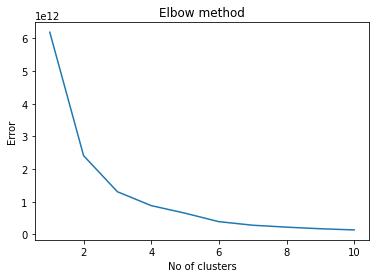

In [20]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(transpose_countries)
    kmeans.fit(transpose_countries)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [24]:
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = KMeans(n_clusters=3, random_state=0).fit(transpose_countries)
labels = kmeans.labels_
print("labels",labels)
clmns = list(transpose_countries.columns)
print("clmns is :",clmns)
#Glue back to originaal data
transpose_countries['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

##Lets analyze the clusters

labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0]
clmns is : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 'clusters']


In [25]:
print(transpose_countries[clmns].groupby(transpose_countries.clusters).mean())

                 0         1         2  ...             84  clusters  clusters
clusters                                ...                                   
0         2.460000  3.430000  5.165000  ...    1518.420000         0         0
1         4.555556  5.333333  6.777778  ...  109256.333333         1         1
2         1.000000  1.000000  1.000000  ...  582594.000000         2         2

[3 rows x 87 columns]
